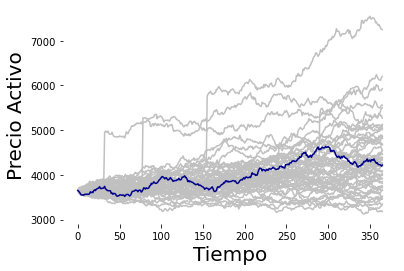

In [1]:
from numpy import *
from pylab import *
from numpy.random import rand
import scipy.stats
import PoissonGenerator
import matplotlib.pyplot as plt

#----------------------------www.quant-trading.co-----------------------------------------------------------#

########################################################################################################################################3
#En este metodo asumimos que los Yi tienen una distribucion lognormal con parametros (a,b)
if True:
    lamda = 0.1                 #Numero promedio de saltos
    T = 1                       #Tiempo final de la simulacion
    d = 365                     #Numero de periodos de la simulacion
    delta_t = T/d               #Tamano de paso
    M = 10**4                   #Numero total de simulaciones
    a = 0.25                     #Tamano promedio del salto
    b = 0.05                     #Desviacion estandar de los saltos
    m = exp(a+0.5*b**2)-1       #m = Promedio de los saltos - 1. Recordemos que Yi se distribuye lognormal. Asi entonces el promedio es exp(a+0.5b^2)

    r = 0.175                    #Tasa de interes
    sigma = 0.12               #Volatilidad del activo
    S0 = 3650                   #Precio inicial del spot
    K = 100

    #Random variables generation
    z1 = randn(M,d)                   #Variable aleatoria normal para generar el movimiento browniano
    z2 = randn(M,d)                   #Variable aleatoria normal para generar el salto

    N = PoissonGenerator.Poisson(M,lamda*delta_t)            #Variable aleatoria Poisson
    for i in range(0,d-1):
        N = append(N,PoissonGenerator.Poisson(M,lamda*delta_t))

    N = resize(N,(M,d))

    J = a*N+b*sqrt(N)*z2               #Suma del log de los saltos. Estos se distribuyen lognormal
    x = zeros((M,d+1))
    x[:,0]=log(S0)
    
    #Generacion del path
    for j in range(0,d):
        x[:,j+1]= x[:,j] + (r-lamda*m-0.5*sigma**2)*delta_t+sigma*sqrt(delta_t)*z1[:,j]+J[:,j]

    path = exp(x)
    if True:
        #Grafico de los 50 primeros paths
        plt.plot(path[0:50,:].transpose(),c='silver')
        plt.plot(path[0:1,:].transpose(),c='darkblue')
        ylabel('Precio Activo',fontsize=20)
        xlabel( 'Tiempo',fontsize=20)
        box(on=None)
        show()

    #Valoracion de opcion call y put
    payoff_call = maximum(path[:,d]-K,0)*exp(-r*T)
    price_call = payoff_call.mean()
    std_error_call = 1.96*payoff_call.std()/sqrt(M)

    payoff_put = maximum(K-path[:,d],0)*exp(-r*T)
    price_put = payoff_put.mean()
    std_error_put = 1.96*payoff_put.std()/sqrt(M)
###########################################################################################################################################################
###########################################################################################################################################################

if False:
#Este metodo es mucho mas general ya que los Yi no distribuyen lognormal. En este ejemplo particular se hace para
#saltos con distribucion uniforme o exponencial. Recordemos que Yi puede ser interpretado como el retorno despues del salto


    lamda = 0.1                         
    T = 1                               
    d = 12                              
    delta_t = T/d                       
    M = 10**4                           
    a = 5                               #Si es exponencial: Tamano promedio del salto, Si es uniforme: Rango inferior del intervalo
    b = 0                               #Si es exponencial: 0, Si es uniforme: Rango superior del intervalo
    dist = 'exponential'


    if dist == 'exponential':
        m = 1/a                 #Promedio. Dependiendo si es exponencial o uniforme
    elif dist == 'uniform':
        m = 0.5*(a+b)-1

        
    r = 0.0175                    
    sigma = 0.12                 
    S0 = 3650                    
    K = 100

    #Generacion de variables aleatorias
    z1 = randn(M,d)                             

    N = PoissonGenerator.Poisson(M,lamda*delta_t)            
    for i in range(0,d-1):
        N = append(N,PoissonGenerator.Poisson(M,lamda*delta_t))

    N = resize(N,(M,d))
    J = zeros((M,d))

    #Loop para generar J (suma de los saltos)
    for i in range(0,M):
        for j in xrange(0,d):
            if N[i,j] == 0:
                J[i,j] =0
            else:
                suma =0
                for k in range(0,int(N[i,j])):
                    if dist == 'exponential':
                        suma = suma+(-log(rand())/a)
                    elif dist == 'uniform':
                        suma = suma + log((a+rand()*(b-a)))               #generando variable aleatoria uniforme [a,b]
                J[i,j] = suma

    x = zeros((M,d+1))

    #Generacion de paths
    for j in range(0,d):
        x[:,j+1]= x[:,j] + (r-lamda*m-0.5*sigma**2)*delta_t+sigma*sqrt(delta_t)*z1[:,j]+J[:,j]

    path = S0*exp(x)
    if True:
        #Grafico de los 50 primeros paths        
        plt.plot(path[0:50,:].transpose(),c='silver')
        plt.plot(path[0:1,:].transpose(),c='darkblue')
        ylabel('Precio Activo',fontsize=20)
        xlabel( 'Tiempo',fontsize=20)
        box(on=None)
        show()

    #Valoracion de opcion call y put
    payoff_call = maximum(path[:,d]-K,0)*exp(-r*T)
    price_call = payoff_call.mean()
    std_error_call = 1.96*payoff_call.std()/sqrt(M)

    payoff_put = maximum(K-path[:,d],0)*exp(-r*T)
    price_put = payoff_put.mean()
    std_error_put = 1.96*payoff_put.std()/sqrt(M)
